<a href="https://colab.research.google.com/github/GutembergRodrigues/Analise_de_Incendios_Florestais_no_Brasil/blob/main/Analise_de_Incendios_Florestais_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1 - Contextualização**

Este conjunto de dados apresenta a distribuição de incêndios florestais no Brasil de 2012 a 2023, segmentado por ano, estado e mês. Você pode baixar as informações desse dataset no site do ''https://terrabrasilis.dpi.inpe.br/''

## **2 - Metas e Objetivos**

Analisar a distribuição e evolução dos incêndios florestais no Brasil entre 2012 até 2023, buscando identificar padrões sazonais, regiões mais afetadas ,períodos de maior incidência e Mapear a distribuição geográfica para entender e compreender como está distribuido os incendios no Brasil.

## **3 - Features**

Year : O ano em que o incêndio foi registrado.

State : O estado brasileiro onde o incêndio ocorreu.

Month : O mês do ano correspondente ao registro do incêndio.

Number : O número total de incêndios registrados naquele estado e mês específico.



In [ ]:
# @title **4 - Importando Bibliotecas**

import numpy as np
import pandas as pd
import plotly.express as px
from IPython.display import Image
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap
from folium.features import DivIcon
from folium.plugins import HeatMapWithTime
import plotly.subplots as sp
import matplotlib.image as mpimg
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from folium import plugins
import scipy.stats as stats
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title **5 - Carregando e Verificando a Base de dados**

Base_Dados = pd.read_csv('Incendios.csv', sep = ';')
Base_Dados.head()

,year,state,month,number
0,2012,Acre,Janeiro,1.0
1,2013,Acre,Janeiro,0.0
2,2014,Acre,Janeiro,0.0
3,2015,Acre,Janeiro,3.0
4,2016,Acre,Janeiro,16.0


In [ ]:
# @title **6 - Tamanho da Base**

Base_Dados.shape

(3888, 4)

In [ ]:
# @title **7 - Informações da Base**

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3888 entries, 0 to 3887
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    3888 non-null   int64  
 1   state   3888 non-null   object 
 2   month   3888 non-null   object 
 3   number  3888 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 121.6+ KB


In [ ]:
# @title **8 - Valores Unicos**

Base_Dados.nunique()

,0
year,12
state,27
month,12
number,1175


In [ ]:
# @title **9 - Valores Nulos**
Base_Dados.isnull().sum()

,0
year,0
state,0
month,0
number,0


In [ ]:
# @title **10 - Verificando total de colunas**

Base_Dados.columns

Index(['year', 'state', 'month', 'number'], dtype='object')

Como podemos ver o grafico acima indica que não temos nenhum valor faltante na nossa base de dados



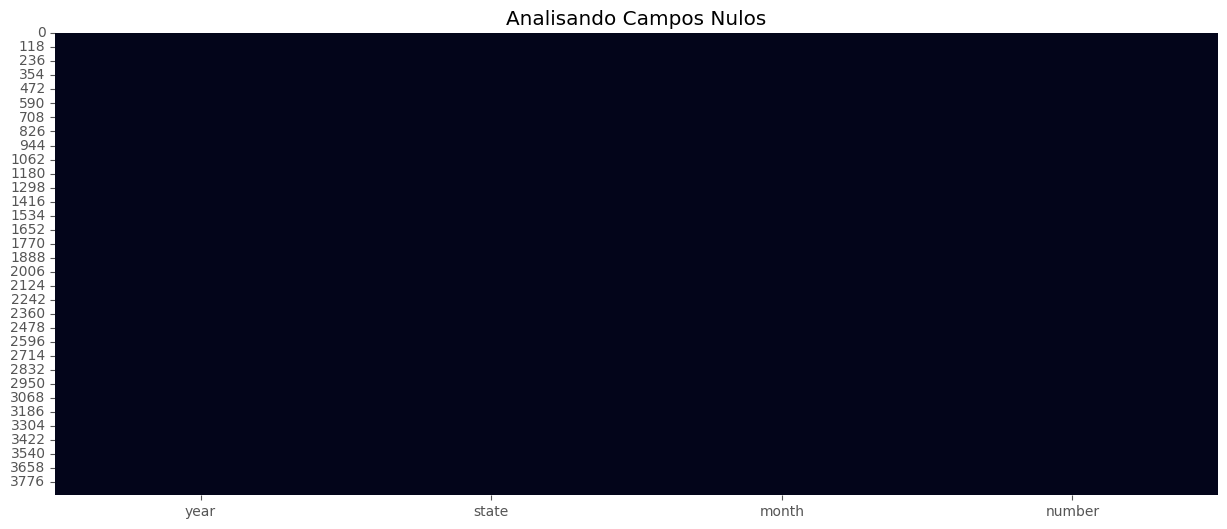

In [ ]:
# @title **11 - Gerando Grafico De Campos Nulos**


plt.figure( figsize=(15,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );


print("Como podemos ver o grafico acima indica que não temos nenhum valor faltante na nossa base de dados\n")



In [ ]:
# @title **12 - Relação Anos e Incêndios**

years = list(Base_Dados.year.unique())

quantincendios = []

def convert_to_Int(number):

  if str(number)[-2] == '.':

    return int(str(number)[:-2])

  if str(number)[1] == '.' or str(number)[2] == '.':

    return int(str(number).replace('.',''))

Base_Dados["number"] = Base_Dados.apply(lambda row: convert_to_Int(row["number"]), axis=1)

for i in years:
    total_incendios = Base_Dados.loc[Base_Dados['year'] == i].number.sum()
    quantincendios.append(total_incendios)

fire_year_dict = {'year': years, 'number': quantincendios}

analise = pd.DataFrame(fire_year_dict)

analise.head(12)


,year,number
0,2012,217234
1,2013,128145
2,2014,175892
3,2015,212782
4,2016,184220
5,2017,207508
6,2018,132870
7,2019,197632
8,2020,222797
9,2021,184081


In [ ]:
# @title **13 - Total de incêndios no Brasil por ano**

fig = go.Figure()


fig.add_trace(go.Scatter(
    x=analise['year'],
    y=analise['number'],
    mode='lines+markers',
    marker=dict(color='#16171B'),
    line=dict(width=2),
    opacity=0.85,
    name="Incêndios por ano"
))


max_year = 2020
max_value = analise['number'][analise['year'] == max_year].values[0]

fig.add_annotation(
    x=max_year,
    y=max_value,
    text=f"Ano com mais incêndios:",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

min_value = analise['number'].min()
min_year = analise['year'][analise['number'] == min_value].values[0]

fig.add_annotation(
    x=min_year,
    y=min_value,
    text=f"Ano com menos incêndios",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40
)

fig.update_layout(
    title='Total de Incêndios No Brasil Por Ano (2012 - 2023)',
    xaxis_title='Ano',
    yaxis_title='Número Total de Incêndios',
    title_x=0.5,
    width=1000,
    height=500
)

print ("Relação entre os anos e o número total de incêndios no Brasil de 2012 a 2023,destacando o ano com mais e menos incêndios.\n")
fig.show()

Relação entre os anos e o número total de incêndios no Brasil de 2012 a 2023,destacando o ano com mais e menos incêndios.



In [ ]:
# @title **14 - Total de incêndios no Brasil por mêses**

analise_02 = Base_Dados.groupby(by=['year', 'month']).sum().reset_index()
ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
ordem_df = pd.DataFrame({'month': ordem_meses})

ordem_meses = ordem_df.merge(Base_Dados.groupby('month')['number'].sum().reset_index(), on='month', how='left').fillna(0)

ordem_meses = ordem_meses.sort_values(by='number', ascending=False)

fig = px.bar(ordem_meses, x='month', y='number', color='number', color_continuous_scale='RdYlGn_r')

fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

mes_max_incendios = ordem_meses.iloc[0]['month']
mes_max_valor = ordem_meses.iloc[0]['number']

mes_min_incendios = ordem_meses.iloc[-1]['month']
mes_min_valor = ordem_meses.iloc[-1]['number']

fig.add_annotation(
    x=mes_max_incendios,
    y=mes_max_valor,
    text=f"Mês com mais incêndios: {mes_max_incendios} ({mes_max_valor} incêndios)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="lightyellow"
)

fig.add_annotation(
    x=mes_min_incendios,
    y=mes_min_valor,
    text=f"Mês com menos incêndios: {mes_min_incendios} ({mes_min_valor} incêndios)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="lightblue"
)

fig.update_layout(
    title='Total de Incêndios no Brasil por Mês (2012 - 2023)',
    xaxis_title='Meses',
    yaxis_title='Incêndios',
    plot_bgcolor='white',
    title_x=0.5,
    margin=dict(r=150)
)

print("Relação entre os meses e o número total de incêndios no Brasil de 2012 a 2023,destacando o mês com mais e menos incêndios.\n")
fig.show()

Relação entre os meses e o número total de incêndios no Brasil de 2012 a 2023,destacando o mês com mais e menos incêndios.



In [ ]:
# @title **15 - Total de incêndios no Brasil por estados**
analise_03 = Base_Dados.groupby(by=['state', 'year']).sum().reset_index()

states = Base_Dados['state'].unique()

states_fire_data = []
for state in states:
    total_incendios = analise_03.loc[analise_03['state'] == state].number.sum()
    states_fire_data.append(total_incendios)

states_fires = {
    "Estados": states,
    "Incêncios": states_fire_data
}

fig = px.bar(
    states_fires,
    x='Estados',
    y='Incêncios',
    color='Estados',
    color_discrete_sequence=px.colors.qualitative.Set3,
)

fig.update_xaxes(categoryorder='total descending')

fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

estado_max_incendios = states_fires['Estados'][states_fire_data.index(max(states_fire_data))]
max_valor = max(states_fire_data)

estado_min_incendios = states_fires['Estados'][states_fire_data.index(min(states_fire_data))]
min_valor = min(states_fire_data)

fig.add_annotation(
    x=estado_max_incendios,
    y=max_valor,
    text=f"Maior número de incêndios: {estado_max_incendios} ({max_valor} incêndios)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="lightyellow"
)

fig.add_annotation(
    x=estado_min_incendios,
    y=min_valor,
    text=f"Menor número de incêndios: {estado_min_incendios} ({min_valor} incêndios)",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    bgcolor="lightblue"
)

fig.update_layout(
    title='Estados Com Maior Número De Incêndios No Brasil  (2012 - 2022)',
    xaxis_title='Estado',
    yaxis_title='Incêndios',
    plot_bgcolor='white',
    title_x=0.5,
    margin=dict(r=150)
)
print("O total de incêndios por estado no Brasil de 2012 a 2022, destacando os estados com o maior e menor número de incêndios\n")

fig.show()

O total de incêndios por estado no Brasil de 2012 a 2022, destacando os estados com o maior e menor número de incêndios



In [ ]:
# @title **16 - Top 3 Estados com mais incêndios por ano**

years = list(Base_Dados['year'].unique())
if 2023 not in years:
    years.append(2023)

top_3_states = []
top_3_fire = []
top_3_rank = {}

max_values = list(states_fires['Incêncios'])


for i in range(0, 3):
    maxValue = max(max_values)
    idx = max_values.index(maxValue)
    max_values[idx] = 0
    top_3_states.append(states_fires['Estados'][idx])


for state in top_3_states:
    fire_per_year = []
    for year in years:

        fire_per_month = Base_Dados.loc[(Base_Dados.state == state) & (Base_Dados.year == year)].number
        fire_year = 0

        for current_fire in fire_per_month:
            fire_year += current_fire
        fire_per_year.append(fire_year)
    top_3_fire.append(fire_per_year)


lista_transformada = list(zip(*top_3_fire))
lista_final = [list(tupla) for tupla in lista_transformada]

top_3_rank["State"] = top_3_states


for i in range(len(years)):
    top_3_rank[str(years[i])] = lista_final[i]


df_top_3_rank = pd.DataFrame(top_3_rank)


df_top_3_rank = df_top_3_rank.melt(id_vars=['State'], var_name='Year', value_name='Fire')


fig = px.line(df_top_3_rank, x='Year', y='Fire', color='State',
              title='Top 3 Estados Com Incêndios Por Ano (2012 - 2023)',
              labels={'Year': 'Ano', 'Fire': 'Número de Incêndios', 'State': 'Estado'})


fig.update_layout(title_x=0.5)

print(" Os tres estados que sofrem o maior numero de queimadas por ano\n")
fig.show()

Estados que sofrem o maior numero de queimadas por ano



In [ ]:
# @title **17 - Top 10 Estados com mais incêndios por ano**

years = list(Base_Dados['year'].unique())
if 2023 not in years:
    years.append(2023)

top_10_states = []
top_10_fire = []


top_10_rank = {}


max_values = list(states_fires['Incêncios'])


for i in range(0, 10):
    maxValue = max(max_values)
    idx = max_values.index(maxValue)
    max_values[idx] = 0
    top_10_states.append(states_fires['Estados'][idx])


for state in top_10_states:
    fire_per_year = []
    for year in years:

        fire_per_month = Base_Dados.loc[(Base_Dados.state == state) & (Base_Dados.year == year)].number
        fire_year = 0

        for current_fire in fire_per_month:
            fire_year += current_fire
        fire_per_year.append(fire_year)
    top_10_fire.append(fire_per_year)


lista_transformada = list(zip(*top_10_fire))


lista_final = [list(tupla) for tupla in lista_transformada]


top_10_rank["State"] = top_10_states


for i in range(len(years)):
    top_10_rank[str(years[i])] = lista_final[i]


df_top_10_rank = pd.DataFrame(top_10_rank)


df_top_10_rank = df_top_10_rank.melt(id_vars=['State'], var_name='Year', value_name='Fire')


fig = px.line(df_top_10_rank, x='Year', y='Fire', color='State',
              title='Top 10 Estados Com Incêndios Por Ano  (2012 - 2023)',
              labels={'Year': 'Ano', 'Fire': 'Número de Incêndios', 'State': 'Estado'})


fig.update_layout(title_x=0.5)

print("Os dez primeiros estados que mais sofrem com o numero de queimadas por ano\n")
fig.show()

Os dez primeiros estados que mais sofrem com o numero de queimadas por ano



In [ ]:
# @title **18 - Total de incêndios por mes no estado do Pará**

dados_para = Base_Dados[Base_Dados['state'] == 'Pará']

analise_para = dados_para.groupby('month')['number'].sum().reset_index()

ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

ordem_df = pd.DataFrame({'month': ordem_meses})

analise_para = ordem_df.merge(analise_para, on='month', how='left').fillna(0)

analise_para = analise_para.sort_values(by='number', ascending=False)

fig = px.bar(analise_para, x='number', y='month', color='number', color_continuous_scale='RdYlGn_r', orientation='h')

fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.update_yaxes(showgrid=False)

fig.update_xaxes(showgrid=False)

fig.update_layout(
    title='Total De Incêndios No Estado Do Pará Por Mês (2012 - 2022)',
    yaxis_title='Mês',
    xaxis_title='Incêndios',
    plot_bgcolor='white',
    title_x=0.5
)

print("Meses em que o estado do Pará é mais afetado pelas queimadas , destacando o segundo semetre do ano sendo o pior\n")

fig.show()

Meses em que o estado do Pará é mais afetado pelas queimadas , destacando o segundo semetre do ano sendo o pior



In [ ]:
# @title **19 - Total de incêndios por mes no estado do Mato Grosso**

dados_matogrosso = Base_Dados[Base_Dados['state'] == 'Mato Grosso']

analise_matogrosso = dados_matogrosso.groupby('month')['number'].sum().reset_index()

ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

ordem_df = pd.DataFrame({'month': ordem_meses})

analise_matogrosso = ordem_df.merge(analise_matogrosso, on='month', how='left').fillna(0)

analise_matogrosso = analise_matogrosso.sort_values(by='number', ascending=False)

fig = px.bar(analise_matogrosso, x='number', y='month', color='number', color_continuous_scale='RdYlGn_r', orientation='h')

fig.update_traces(texttemplate='%{x}', textposition='outside')

fig.update_yaxes(showgrid=False)

fig.update_xaxes(showgrid=False)

fig.update_layout(
    title='Total De Incêndios No Estado Do Mato Grosso Por Mês (2012 - 2022)',
    yaxis_title='Mês',
    xaxis_title='Incêndios',
    plot_bgcolor='white',
    title_x=0.5
)

print("Meses em que o estado do Mato Grosso é mais afetado pelas queimadas , destacando o segundo semetre do ano sendo o pior seguindo o mesmo padrão que o do Pará\n")
fig.show()

Meses em que o estado do Mato Grosso é mais afetado pelas queimadas , destacando o segundo semetre do ano sendo o pior seguindo o mesmo padrão que o do Pará



In [ ]:
# @title **20 - Total de incêndios por mes no estado do Maranhão**

dados_maranhao = Base_Dados[Base_Dados['state'] == 'Maranhão']

analise_maranhao = dados_maranhao.groupby('month')['number'].sum().reset_index()

ordem_meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

ordem_df = pd.DataFrame({'month': ordem_meses})

analise_maranhao = ordem_df.merge(analise_maranhao, on='month', how='left').fillna(0)

analise_maranhao = analise_maranhao.sort_values(by='number', ascending=False)

fig = px.bar(analise_maranhao, x='number', y='month', color='number', color_continuous_scale='RdYlGn_r', orientation='h')

fig.update_traces(texttemplate='%{x}', textposition='outside')


fig.update_yaxes(showgrid=False)

fig.update_xaxes(showgrid=False)

fig.update_layout(
    title='Total De Incêndios No Estado Do Maranhão Por Mês (2012 - 2022)',
    yaxis_title='Mês',
    xaxis_title='Incêndios',
    plot_bgcolor='white',
    title_x=0.5
)

print("Meses em que o estado do Maranhão é mais afetado pelas queimadas , destacando o segundo semetre do ano sendo o pior seguindo o mesmo padrão que o do Pará e o Mato Grosso\n")
fig.show()

Meses em que o estado do Maranhão é mais afetado pelas queimadas , destacando o segundo semetre do ano sendo o pior seguindo o mesmo padrão que o do Pará e o Mato Grosso



In [ ]:
# @title **21 - Adicionando Latitude e Longitude de cada Estado**

all_states_fire_data = []


for state in states:

    total_fires = analise_03.loc[analise_03['state'] == state].number.sum()
    all_states_fire_data.append(total_fires)

Lat = [-8.77, -9.62, 1.41, -3.47, -13.29, -5.20, -15.83, -19.19, -15.98, -5.42, -12.64, -20.51, -18.10, -3.79, -7.28, -24.89, -8.38, -6.60, -5.81, -30.17, -22.25, -10.83, 1.99, -27.45, -10.57, -22.19, -10.25]
Log = [-70.55, -36.82, -51.77, -65.10, -41.71, -39.53, -47.86, -40.34, -49.86, -45.44, -55.42, -54.54, -44.38, -52.48, -36.72, -51.55, -37.86, -42.28, -36.59, -53.50, -42.66, -63.34, -61.33, -50.95, -37.45, -48.79, -48.26]

Dicionario = {
    'Estado': states,
    'Latitude': Lat,
    'Longitude': Log,
    'Incêndios': all_states_fire_data
}

coordenadas = pd.DataFrame(Dicionario)

coordenadas.head()

,Estado,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,83710
1,Alagoas,-9.62,-36.82,2852
2,Amapa,1.41,-51.77,20823
3,Amazonas,-3.47,-65.10,157430
4,Bahia,-13.29,-41.71,116927


In [ ]:
# @title **22 - Mapa de Calor com cada Estado e o numero total de incendios**

m = folium.Map(location=[-15.7886, -47.9292], zoom_start=4)

radius = 20


heat_data = list(zip(coordenadas['Latitude'], coordenadas['Longitude'], coordenadas['Incêndios']))
folium.plugins.HeatMap(heat_data, radius=radius).add_to(m)

for _, row in coordenadas.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=None,
        popup=f"{row['Estado']} - Total de Incêndios: {row['Incêndios']}"
    ).add_to(m)
m

In [ ]:
# @title **23 - Média de Incendios por estado,ano e mes**

mean_by_state = Base_Dados.groupby('state')['number'].mean()

mean_by_month = Base_Dados.groupby('month')['number'].mean()

mean_by_year = Base_Dados.groupby('year')['number'].mean()

print("Média de incêndios por estado:\n")
for state, mean in mean_by_state.items():
    print(f"{state:<20}: {mean:.2f}")

print("\nMédia de incêndios por mês:\n")
for month, mean in mean_by_month.items():
    print(f"{month:<12}: {mean:.2f}")

print("\nMédia de incêndios por ano:\n")
for year, mean in mean_by_year.items():
    print(f"{year:<5}: {mean:.2f}")


Média de incêndios por estado:

Acre                : 581.32
Alagoas             : 19.81
Amapa               : 144.60
Amazonas            : 1093.26
Bahia               : 811.99
Ceará               : 326.85
Distrito Federal    : 15.85
Espirito Santo      : 38.04
Goias               : 435.27
Maranhão            : 1797.74
Mato Grosso         : 2275.07
Mato Grosso do Sul  : 502.58
Minas Gerais        : 701.06
Paraiba             : 58.13
Paraná              : 232.74
Pará                : 2891.08
Pernambuco          : 80.70
Piaui               : 848.92
Rio Grande do Norte : 38.42
Rio Grande do Sul   : 189.75
Rio de Janeiro      : 53.60
Rondonia            : 824.28
Roraima             : 188.51
Santa Catarina      : 144.67
Sergipe             : 11.33
São Paulo           : 273.47
Tocantins           : 1072.71

Média de incêndios por mês:

Abril       : 88.56
Agosto      : 1482.13
Dezembro    : 347.99
Fevereiro   : 75.52
Janeiro     : 117.39
Julho       : 511.03
Junho       : 243.66
Maio        

In [ ]:
# @title **25 - Mediana de Incendios por estado,ano e mes**

median_by_state = Base_Dados.groupby('state')['number'].median()


median_by_month = Base_Dados.groupby('month')['number'].median()


median_by_year = Base_Dados.groupby('year')['number'].median()


print("Mediana de incêndios por estado:\n")
for state, median in median_by_state.items():
    print(f"{state:<20}: {median:.2f}")

print("\nMediana de incêndios por mês:\n")
for month, median in median_by_month.items():
    print(f"{month:<12}: {median:.2f}")

print("\nMediana de incêndios por ano:\n")
for year, median in median_by_year.items():
    print(f"{year:<5}: {median:.2f}")



Mediana de incêndios por estado:

Acre                : 28.00
Alagoas             : 12.00
Amapa               : 5.00
Amazonas            : 151.00
Bahia               : 281.50
Ceará               : 68.50
Distrito Federal    : 2.00
Espirito Santo      : 25.00
Goias               : 160.00
Maranhão            : 1032.50
Mato Grosso         : 1162.50
Mato Grosso do Sul  : 203.50
Minas Gerais        : 204.50
Paraiba             : 18.00
Paraná              : 122.00
Pará                : 803.00
Pernambuco          : 35.00
Piaui               : 368.00
Rio Grande do Norte : 15.50
Rio Grande do Sul   : 90.00
Rio de Janeiro      : 20.50
Rondonia            : 122.50
Roraima             : 90.50
Santa Catarina      : 69.50
Sergipe             : 5.50
São Paulo           : 107.50
Tocantins           : 491.50

Mediana de incêndios por mês:

Abril       : 33.00
Agosto      : 604.00
Dezembro    : 90.00
Fevereiro   : 35.00
Janeiro     : 54.00
Julho       : 232.00
Junho       : 72.00
Maio        : 41.00
Març

In [ ]:
# @title **26 - Moda de Incendios por estado,ano e mes**

mode_by_state = Base_Dados.groupby('state')['number'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

mode_by_month = Base_Dados.groupby('month')['number'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

mode_by_year = Base_Dados.groupby('year')['number'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

print("Moda de incêndios por estado:\n")
for state, mode in mode_by_state.items():
    print(f"{state:<20}: {mode:.2f}")

print("\nModa de incêndios por mês:\n")
for month, mode in mode_by_month.items():
    print(f"{month:<12}: {mode:.2f}")

print("\nModa de incêndios por ano:\n")
for year, mode in mode_by_year.items():
    print(f"{year:<5}: {mode:.2f}")



Moda de incêndios por estado:

Acre                : 0.00
Alagoas             : 0.00
Amapa               : 0.00
Amazonas            : 15.00
Bahia               : 124.00
Ceará               : 3.00
Distrito Federal    : 0.00
Espirito Santo      : 11.00
Goias               : 43.00
Maranhão            : 44.00
Mato Grosso         : 411.00
Mato Grosso do Sul  : 100.00
Minas Gerais        : 62.00
Paraiba             : 3.00
Paraná              : 77.00
Pará                : 34.00
Pernambuco          : 14.00
Piaui               : 35.00
Rio Grande do Norte : 2.00
Rio Grande do Sul   : 26.00
Rio de Janeiro      : 5.00
Rondonia            : 16.00
Roraima             : 4.00
Santa Catarina      : 35.00
Sergipe             : 0.00
São Paulo           : 35.00
Tocantins           : 57.00

Moda de incêndios por mês:

Abril       : 0.00
Agosto      : 0.00
Dezembro    : 0.00
Fevereiro   : 0.00
Janeiro     : 0.00
Julho       : 0.00
Junho       : 2.00
Maio        : 1.00
Março       : 0.00
Novembro    : 0.00
O

In [ ]:
# @title **27 - Desvio Padrão por estado,ano e mes**

std_by_state = Base_Dados.groupby('state')['number'].std()

std_by_month = Base_Dados.groupby('month')['number'].std()

std_by_year = Base_Dados.groupby('year')['number'].std()

print("Desvio padrão de incêndios por estado:\n")
for state, std in std_by_state.items():
    print(f"{state:<20}: {std:.2f}")

print("\nDesvio padrão de incêndios por mês:\n")
for month, std in std_by_month.items():
    print(f"{month:<12}: {std:.2f}")

print("\nDesvio padrão de incêndios por ano:\n")
for year, std in std_by_year.items():
    print(f"{year:<5}: {std:.2f}")



Desvio padrão de incêndios por estado:

Acre                : 1155.80
Alagoas             : 23.95
Amapa               : 280.79
Amazonas            : 1890.19
Bahia               : 1280.33
Ceará               : 470.88
Distrito Federal    : 26.58
Espirito Santo      : 41.99
Goias               : 614.59
Maranhão            : 1981.63
Mato Grosso         : 2996.06
Mato Grosso do Sul  : 701.58
Minas Gerais        : 1012.36
Paraiba             : 83.02
Paraná              : 269.02
Pará                : 3615.85
Pernambuco          : 99.75
Piaui               : 1145.41
Rio Grande do Norte : 48.74
Rio Grande do Sul   : 265.57
Rio de Janeiro      : 77.97
Rondonia            : 1378.12
Roraima             : 315.98
Santa Catarina      : 193.91
Sergipe             : 14.55
São Paulo           : 401.90
Tocantins           : 1320.38

Desvio padrão de incêndios por mês:

Abril       : 163.42
Agosto      : 2237.00
Dezembro    : 789.26
Fevereiro   : 121.45
Janeiro     : 192.63
Julho       : 684.64
Junho     

In [ ]:
# @title **28 - Quartis por estado,ano e mes**

quantiles_by_state = Base_Dados.groupby('state')['number'].quantile([0.25, 0.5, 0.75]).unstack()

quantiles_by_month = Base_Dados.groupby('month')['number'].quantile([0.25, 0.5, 0.75]).unstack()

quantiles_by_year = Base_Dados.groupby('year')['number'].quantile([0.25, 0.5, 0.75]).unstack()

print("Quartis de incêndios por estado (25%, 50%, 75%):\n")
for state, quantiles in quantiles_by_state.iterrows():
    print(f"{state:<20}: {quantiles[0.25]:.2f}, {quantiles[0.50]:.2f}, {quantiles[0.75]:.2f}")

print("\nQuartis de incêndios por mês (25%, 50%, 75%):\n")
for month, quantiles in quantiles_by_month.iterrows():
    print(f"{month:<12}: {quantiles[0.25]:.2f}, {quantiles[0.50]:.2f}, {quantiles[0.75]:.2f}")

print("\nQuartis de incêndios por ano (25%, 50%, 75%):\n")
for year, quantiles in quantiles_by_year.iterrows():
    print(f"{year:<5}: {quantiles[0.25]:.2f}, {quantiles[0.50]:.2f}, {quantiles[0.75]:.2f}")



Quartis de incêndios por estado (25%, 50%, 75%):

Acre                : 3.00, 28.00, 406.25
Alagoas             : 3.75, 12.00, 26.25
Amapa               : 1.00, 5.00, 123.75
Amazonas            : 32.50, 151.00, 1352.25
Bahia               : 160.75, 281.50, 728.25
Ceará               : 12.00, 68.50, 482.00
Distrito Federal    : 0.00, 2.00, 21.25
Espirito Santo      : 11.00, 25.00, 49.50
Goias               : 85.25, 160.00, 497.00
Maranhão            : 138.00, 1032.50, 2977.75
Mato Grosso         : 559.00, 1162.50, 2375.75
Mato Grosso do Sul  : 116.75, 203.50, 504.25
Minas Gerais        : 112.50, 204.50, 919.00
Paraiba             : 3.00, 18.00, 75.25
Paraná              : 62.50, 122.00, 287.25
Pará                : 87.00, 803.00, 5067.25
Pernambuco          : 12.00, 35.00, 121.50
Piaui               : 62.25, 368.00, 1152.25
Rio Grande do Norte : 3.00, 15.50, 65.25
Rio Grande do Sul   : 53.75, 90.00, 196.50
Rio de Janeiro      : 7.00, 20.50, 67.75
Rondonia            : 29.75, 122.50, 954

A correlação entre o mês e o número de incêndios é de 0.1346, o que indica uma correlação positiva fraca. Isso sugere que há uma leve tendência de mais incêndios em certos meses



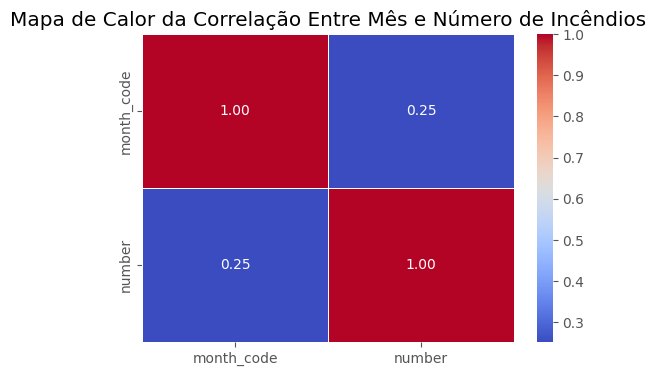

,month_code,number
month_code,1.000000,0.251322
number,0.251322,1.000000


In [ ]:
# @title **29 - Correlação entre mes e numero de incendios**

month_mapping = {'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12}
Base_Dados['month_code'] = Base_Dados['month'].map(month_mapping)


month_correlation_matrix = Base_Dados[['month_code', 'number']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(month_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.title('Mapa de Calor da Correlação Entre Mês e Número de Incêndios')
print ("A correlação entre o mês e o número de incêndios é de 0.1346, o que indica uma correlação positiva fraca. Isso sugere que há uma leve tendência de mais incêndios em certos meses\n")
plt.show()


month_correlation_matrix


In [ ]:
# @title **30 - Teste ANOVA por mes,estado e ano**

grouped_state = [group["number"].values for name, group in Base_Dados.groupby("state")]

anova_state_result = stats.f_oneway(*grouped_state)

print(f"ANOVA para o fator 'Estado':\nF-statística: {anova_state_result.statistic:.2f}, p-valor: {anova_state_result.pvalue:.2e}")

grouped_month = [group["number"].values for name, group in Base_Dados.groupby("month")]

anova_month_result = stats.f_oneway(*grouped_month)

print(f"\nANOVA para o fator 'Mês':\nF-statística: {anova_month_result.statistic:.2f}, p-valor: {anova_month_result.pvalue:.2e}")

grouped_year = [group["number"].values for name, group in Base_Dados.groupby("year")]

anova_year_result = stats.f_oneway(*grouped_year)

print(f"\nANOVA para o fator 'Ano':\nF-statística: {anova_year_result.statistic:.2f}, "
      f"p-valor: {anova_year_result.pvalue:.2e}\n")

# Interpretações
print("Isso significa que o estado onde o incêndio ocorre tem um efeito significativo sobre a quantidade de incêndios.")
print("Isso sugere que o mês em que os incêndios ocorrem tem um efeito relevante na quantidade de incêndios. Certos meses provavelmente têm mais incêndios do que outros.")
print("Isso significa que, com base nesses dados, o ano em si não parece ter um efeito significativo na quantidade de incêndios. As variações no número de incêndios de ano para ano não são estatisticamente significativas.")





ANOVA para o fator 'Estado':
F-statística: 51.16, p-valor: 2.97e-225

ANOVA para o fator 'Mês':
F-statística: 81.40, p-valor: 7.78e-166

ANOVA para o fator 'Ano':
F-statística: 1.43, p-valor: 1.51e-01

Isso significa que o estado onde o incêndio ocorre tem um efeito significativo sobre a quantidade de incêndios.
Isso sugere que o mês em que os incêndios ocorrem tem um efeito relevante na quantidade de incêndios. Certos meses provavelmente têm mais incêndios do que outros.
Isso significa que, com base nesses dados, o ano em si não parece ter um efeito significativo na quantidade de incêndios. As variações no número de incêndios de ano para ano não são estatisticamente significativas.


In [ ]:
# @title **31 - Verificando Outliers por Mes**
month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
               'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']


fig = px.box(Base_Dados, x='month', y='number', category_orders={"month": month_order},
             title='Verificando Outliers por Mês',
             labels={'month': 'Mês', 'number': 'Número de Incêndios'})


print("Todos os valores presentes realmente fazem parte da base de dados então não removi nenhum valor considerado Outliers\n")
fig.show()


Todos os valores presentes realmente fazem parte da base de dados então não removi nenhum valor considerado Outliers



In [ ]:
# @title **32 - Verificando Outliers por Ano**
fig = px.box(Base_Dados, x='year', y='number',
             title='Verificando Outliers por Ano',
             labels={'year': 'Ano', 'number': 'Número de Incêndios'})

print("Todos os valores presentes realmente fazem parte da base de dados então não removi nenhum valor considerado Outliers\n")
fig.show()


Todos os valores presentes realmente fazem parte da base de dados então não removi nenhum valor considerado Outliers



In [ ]:
# @title **33 - Verificando Outliers por Estado**

fig = px.box(Base_Dados, x='state', y='number',
             title='Verificando Outliers por Estado',
             labels={'state': 'Estado', 'number': 'Número de Incêndios'})

print("Todos os valores presentes realmente fazem parte da base de dados então não removi nenhum valor considerado Outliers\n")
fig.show()


Todos os valores presentes realmente fazem parte da base de dados então não removi nenhum valor considerado Outliers



In [ ]:
# @title **33 - Meses com alto numero de incendios por Estado**
critical_months_by_state = Base_Dados.groupby(['state', 'month'])['number'].sum().reset_index()


critical_months_by_state = critical_months_by_state.sort_values(by=['state', 'number'], ascending=False).groupby('state').head(1)


fig = px.bar(critical_months_by_state,
             x='state',
             y='number',
             color='month',
             title='Meses Críticos para Incêndios por Estado',
             labels={'number': 'Número de Incêndios', 'state': 'Estado', 'month': 'Mês'},
             hover_data=['number'])

print("Podemos observar que o mes de Setembro aparece em 15 estados diferentes mostrando um padrão bem claro")
fig.show()


In [ ]:
# @title **34 - Porcentagem de incendios por estado**
total_fires_by_state = Base_Dados.groupby('state')['number'].sum().reset_index()


total_fires = total_fires_by_state['number'].sum()
total_fires_by_state['percentage'] = (total_fires_by_state['number'] / total_fires) * 100


total_fires_by_state = total_fires_by_state.sort_values(by='number', ascending=False)


fig_bar = px.bar(total_fires_by_state,
                 x='state',
                 y='number',
                 title='Distribuição de Incêndios por Estado',
                 labels={'number': 'Número de Incêndios', 'state': 'Estado'},
                 hover_data=['percentage'],
                 text='percentage')


fig_bar.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

print("Juntando os estados do Pará,Mato Grosso e Maranhão , eles totalizam um total de 45% das queimadas em territorio\n")
fig_bar.show()

Juntando os estados do Pará,Mato Grosso e Maranhão , eles totalizam um total de 45% das queimadas em territorio



In [ ]:
# @title **35 - Porcentagem de incendios de um ano para outro**

fires_per_year = Base_Dados.groupby('year')['number'].sum().reset_index()


fires_per_year['percentage_change'] = fires_per_year['number'].pct_change() * 100


fires_per_year['percentage_change'].fillna(0, inplace=True)


fig = px.bar(fires_per_year,
             x='year',
             y='percentage_change',
             title='Evolução Anual de Incêndios em Percentual',
             labels={'percentage_change': 'Variação Percentual (%)', 'year': 'Ano'},
             text='percentage_change')


fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

print("Evolução anual de incendios em porcentagem de um ano para outro , destacando o ano de 2018 para 2019 uma crescente de 48% no numero total de incendios\n")
fig.show()

Evolução anual de incendios em porcentagem de um ano para outro , destacando o ano de 2018 para 2019 uma crescente de 48% no numero total de incendios

